<h2 style="font-weight: 700; text-align: center">Frequency Domain Filtering - Ideal Low And High Pass Filters</h2>

#### Necessary libraries

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Import subject image

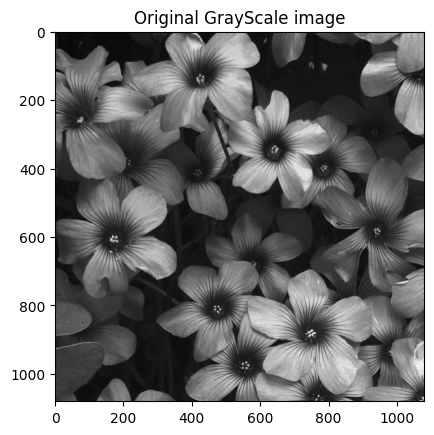

In [2]:
img = cv.imread("../Sample Images/Oxalis.jpg")
imgg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.title("Original GrayScale image")
plt.imshow(imgg, cmap="gray")
plt.show()

# img.shape[0] is rows, img.shape[1] is columns

#### Utility Function - Matplotting the output(s)

In [3]:
def matplot_images(*imgs, titles):
  fig = plt.figure(figsize=(12, 7))
  columns = len(imgs)
  for i in range(columns):
    fig.add_subplot(1, columns, i + 1)
    plt.imshow(imgs[i], cmap="gray")
    plt.title(titles[i])
  plt.show()

#### High/Low Pass Filter (Frequency Domain)

In [4]:
def freq_dom_ideal_pass_filter(img, filter_type='low', Do = 120):
  noofrows, noofcols = img.shape

  #+ 1. Getting the 2D Discrete Fourier Transform
  dft_2d = np.fft.fft2(img)
  
  #+ 2. Shifted 2D_DFT
  shifted_2d_dft = np.fft.fftshift(dft_2d)
  
  #+ 3. Forming the Ideal Low (or High) Pass Filter
  D_u_v = [[(np.sqrt((u - noofrows // 2) ** 2 + (v - noofcols // 2) ** 2)) for v in range(noofcols)] for u in range(noofrows)]
  if filter_type == 'low': 
    H_u_v = [[1 if d <= Do else 0 for d in row] for row in D_u_v]
  elif filter_type == 'high':
    H_u_v = [[0 if d < Do else 1 for d in row] for row in D_u_v]
  else:
    return
    
  #+ 4. Multiplication and inverse shift
  G_u_v = shifted_2d_dft * H_u_v
  G_u_v = np.fft.ifftshift(G_u_v)

  #+ 5. Inverse 2D Discrete Fourier Transform
  reformed_img = np.real(np.fft.ifft2(G_u_v))
  
  return reformed_img

### Callers

#### _**Ideal Low Pass Filter**_

#### 1a. **Cutoff Frequency Do = 20**

In [5]:
ilpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'low', 20)

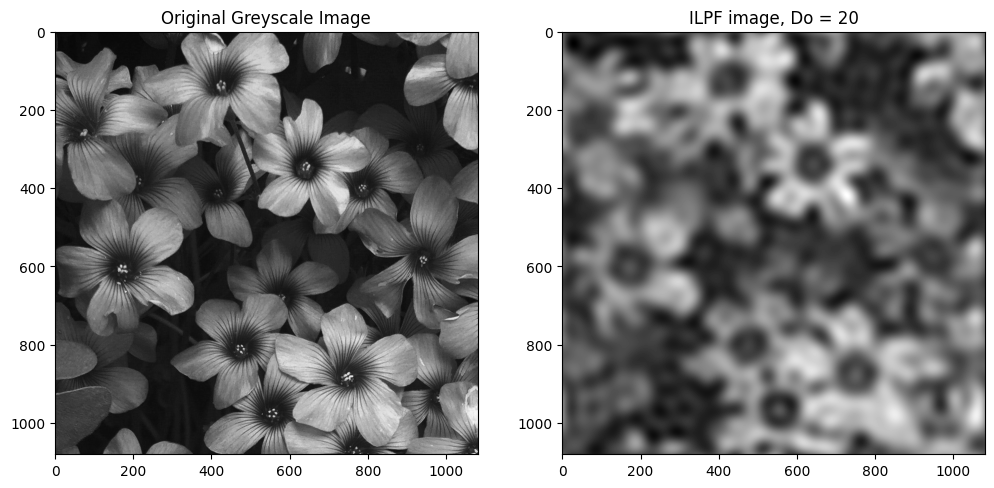

In [6]:
matplot_images(imgg, ilpf_filtered_img, titles=["Original Greyscale Image", "ILPF image, Do = 20"])

#### 1b. **Cutoff Frequency Do = 50**

In [7]:
ilpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'low', 50)

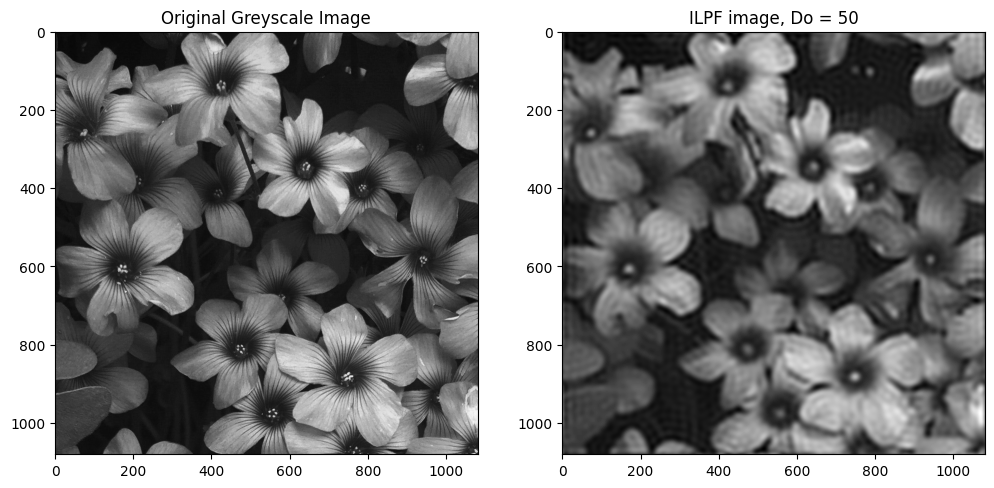

In [8]:
matplot_images(imgg, ilpf_filtered_img, titles=["Original Greyscale Image", "ILPF image, Do = 50"])

#### 1c. **Cutoff Frequency Do = 120**

In [9]:
ilpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'low', 120)

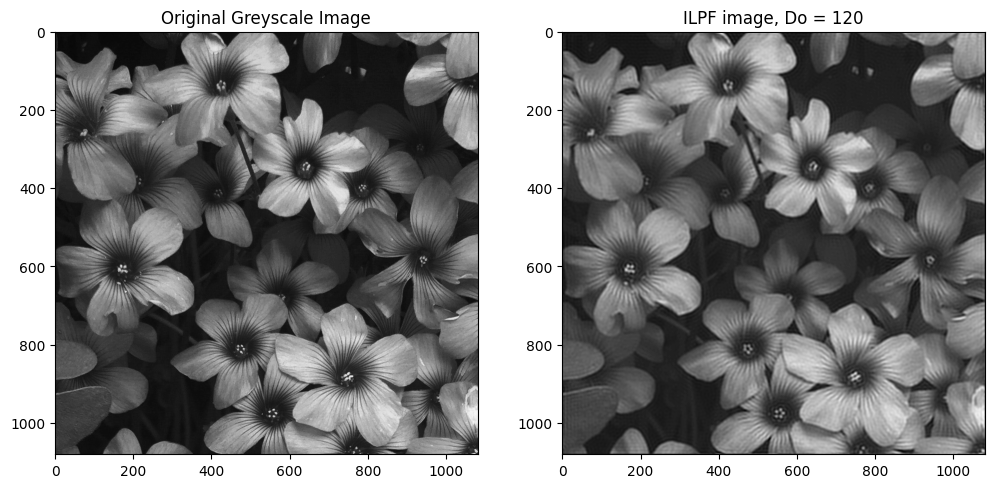

In [10]:
matplot_images(imgg, ilpf_filtered_img, titles=["Original Greyscale Image", "ILPF image, Do = 120"])

#### _**Ideal High Pass Filter**_

#### 2a. **Cutoff Frequency Do = 20**

In [11]:
ihpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'high', 20)

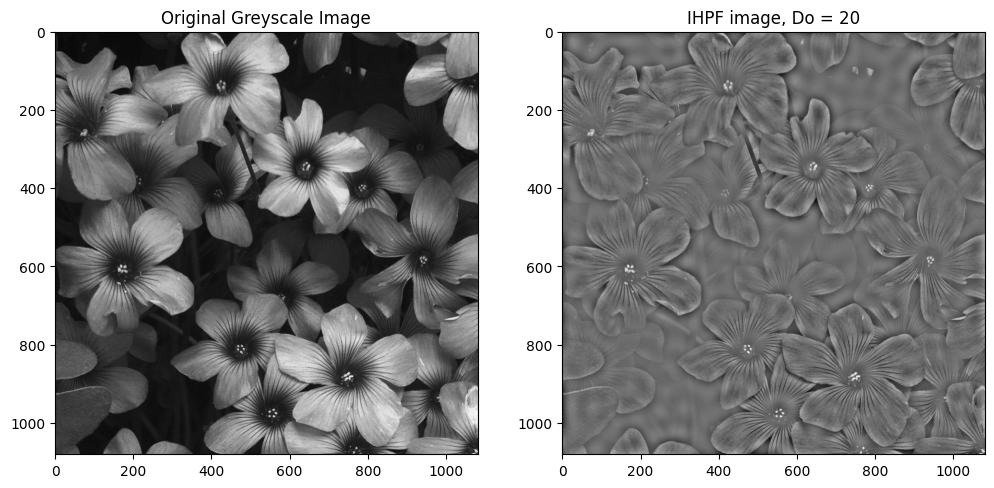

In [12]:
matplot_images(imgg, ihpf_filtered_img, titles=["Original Greyscale Image", "IHPF image, Do = 20"])

#### 2b. **Cutoff Frequency Do = 50**

In [13]:
ihpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'high', 50)

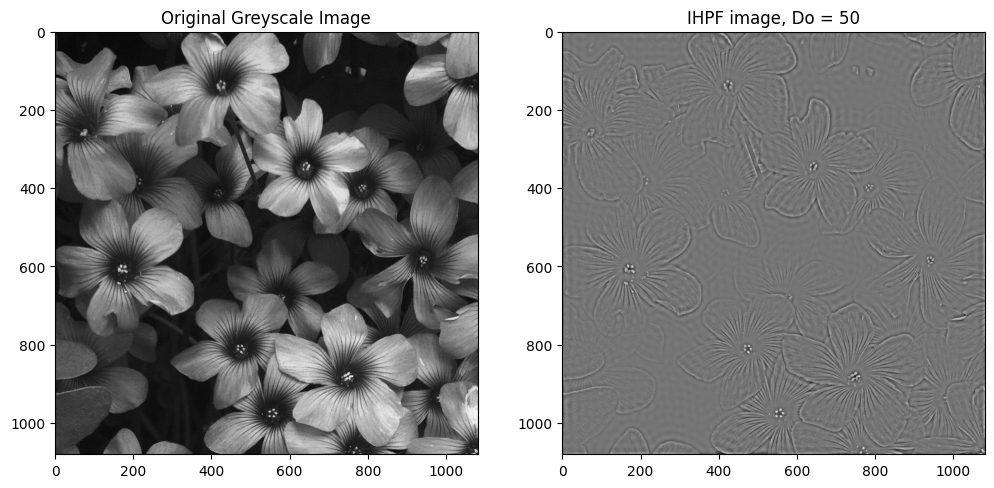

In [14]:
matplot_images(imgg, ihpf_filtered_img, titles=["Original Greyscale Image", "IHPF image, Do = 50"])

#### 2b. Ideal High Pass Filter, **Cutoff Frequency Do = 120**

In [15]:
ihpf_filtered_img = freq_dom_ideal_pass_filter(imgg, 'high', 120)

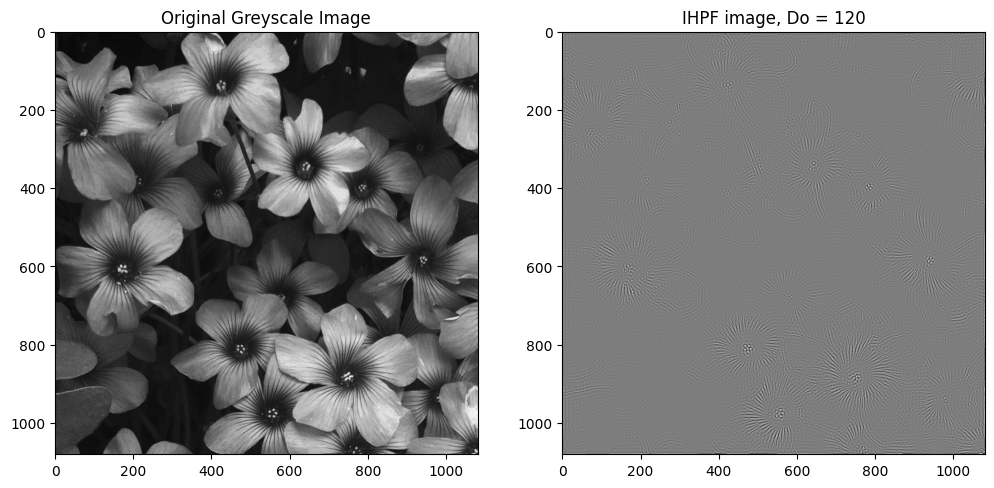

In [16]:
matplot_images(imgg, ihpf_filtered_img, titles=["Original Greyscale Image", "IHPF image, Do = 120"])

#### Conclusion

- _Ideal Low Pass Filter_ allows lower frequencies region (image subject) to pass through and higher frequencies to be blocked. _Ideal High Pass Filter_ does the exact **opposite**, where high frequency regions are the noise, edges and borders. 
- As this fileration is performed in _Frequency Domain_ here, we see frequency specific effects such as **blurring** and **ringing** (The filter H(u, v)'s inverse DFT is a sinc function which is responsible for these).
  - As the **cutoff frequency Do** increases, there are more rings on the image, albeit smaller in size. The blurring decreases as Do increases because the sinc function narrows down.